# Linear regression

### 1. Load the provided .npy files. You can load it with numpy.

* each file contains one vector, X and y
* visualize X vs y on a scatter plot
* fit an  y=w_0 + w_1⋅X + w_2⋅X^2  linear regression using `sklearn`

### 2. Using different features

* plot the residuals (the difference between the prediction and the actual  y ) vs the original  y 
* a non-random-noise like pattern suggests non-linear connection between the features and the predictions
* someone told us that the connection between X and y is  y=A⋅X+B⋅cos^3(X)+C⋅X^2+D 
  * using sklearn's linear regression estimate  A,B,C,D !
* plot the residuals again! is it better now?

### 3. Other methdods than sklearn for linear regression

* using the statsmodels package perform the same linear regression as in 2.) (hint: use statsmodels.api.OLS)
* is the result the same? if not guess, why? (did you not forget to add the constant term?)
* try to get the same results with statsmodels as with sklearn!
* using the analytic solution formula shown during the lecture, calculate the coefficients (A, B, C, D). are they the same compared to the two previous methods?

### 4.

* load the [real_estate](https://gist.github.com/qbeer/f356d7144543cbb09c9792c34b8ad722) data to a pandas dataframe
drop the ID column and the geographic location columns
fit a linear regression model to predict the unit price using sklearn
* interpret the coefficients and their meaning shortly with your own words
* plot the residuals for the predictions. if you had to decide only on this information, which house would you buy?

### 5.
* Using the same dataset from task 4) compute the parameters of the multivariate regression model via gradient descent.
* Compare the calculated parameters with the ones obtained in task 4) via sklearn. Is there any difference? If so give your explanation.

Hint: you can use a function to calculate the loss and a function to perform the gradient descent to learn the parameters. Example:

```python
def comp_cost(X, y, theta):
    """Compute cost given X, y and parameters theta."""
    .
    .
    .
    return J
```

```python
def grad_descent(X, y, theta, alpha, num_iters):
    """Perform gradient descent"""
    .
    .
    .   
    return J_history, theta
```

---

## Hints:

* On total you can get 10 points for fully completing all tasks.
* Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
* Comments you code when necessary
* Write functions for repetitive tasks!
* Use the pandas package for data loading and handling
* Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
* Use the scikit learn package for almost everything
* Use for loops only if it is really necessary!
* Code sharing is not allowed between student! Sharing code will result in zero points.
* If you use code found on web, it is OK, but, make its source clear!

### Task 1

In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd

In [4]:
y = np.load("y.npy")
X = np.load("X.npy")


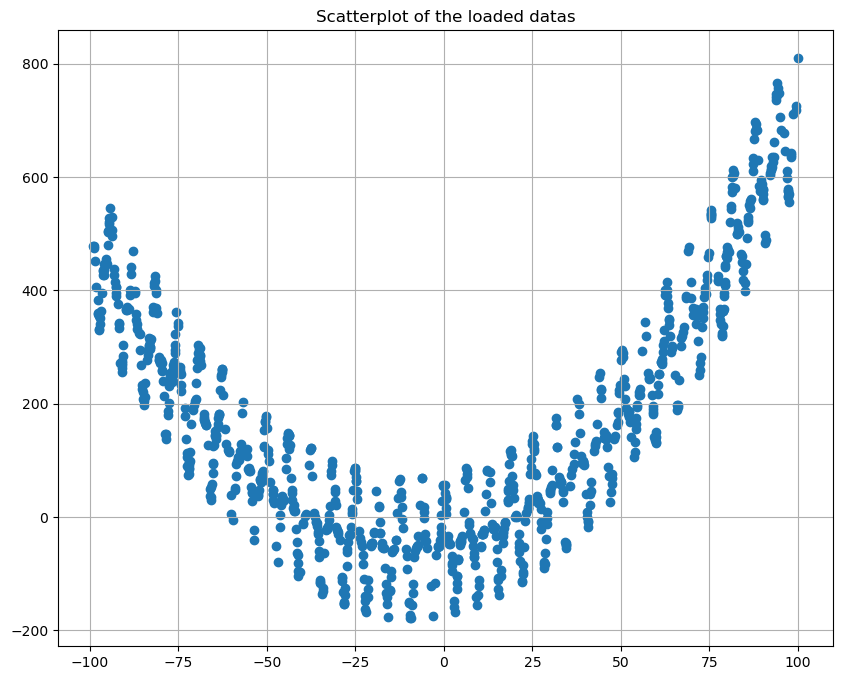

In [5]:
figsize(10,8)
title("Scatterplot of the loaded datas")
scatter(X,y)
grid()

In [6]:
data = pd.DataFrame({'x':X, 'x2':X**2})

data.head()

,x,x2
0,-25.091976,629.607271
1,90.142861,8125.735440
2,46.398788,2152.847561
3,19.731697,389.339860
4,-68.796272,4732.927029


Text(0, 0.5, 'diff. between the pred. and actual y')

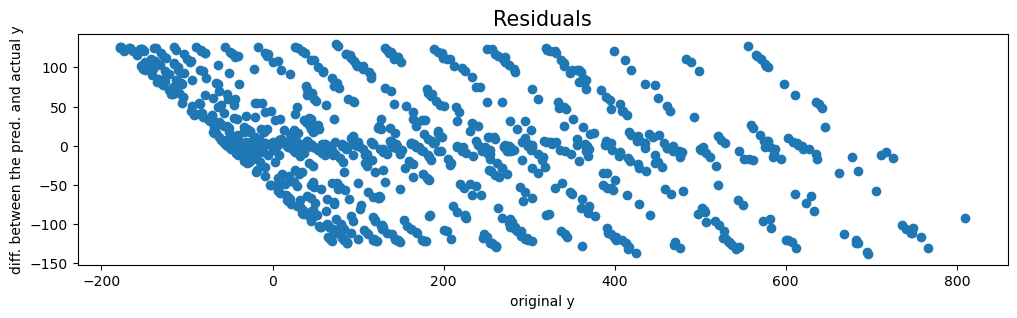

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(data, y)
predict = model.predict(data)
figure(figsize=(12, 3))
scatter(y, predict-y)
title("Residuals", size = 15)
xlabel("original y", size = 10)
ylabel("diff. between the pred. and actual y")


In [8]:
error1 = mean_squared_error(y,predict)
print("The mean squared error between y and the prediction is:", error1)

The mean squared error between y and the prediction is: 4807.798731244549


### Task 2 

In [9]:
#defining the new model:
#using the same steps as before
data2 = pd.DataFrame({'a':X, 'b':np.cos(X)**3, 'c': X**2})

In [10]:
data2.head()

,a,b,c
0,-25.091976,0.997510,629.607271
1,90.142861,-0.185966,8125.735440
2,46.398788,-0.419235,2152.847561
3,19.731697,0.256653,389.339860
4,-68.796272,0.856354,4732.927029


Text(0, 0.5, 'diff. between the pred. and actual y')

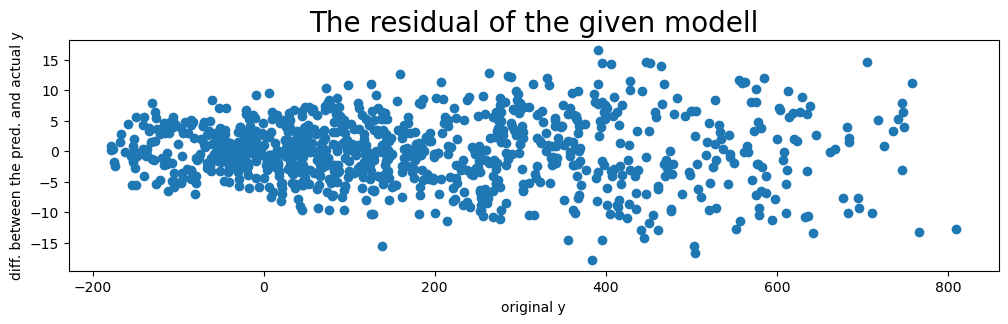

In [11]:
model.fit(data2, y)
predict2 = model.predict(data2)
figure(figsize=(12, 3))
scatter(y, predict2-y)
title("The residual of the given modell", size = 20)
xlabel("original y", size = 10)
ylabel("diff. between the pred. and actual y")

In [12]:
error2 = mean_squared_error(y,predict2)
print("The mean squared error between y and the prediction is:", error2)

The mean squared error between y and the prediction is: 27.432458256378382


As we can see the mean squared error is way smaller with this model, than  with the previous one.

### Task 3

In [13]:
import statsmodels.api as sm
data_with_constant = sm.add_constant(data2) #generates a column of ones to the independent variable
model_stats = sm.OLS(y, data_with_constant).fit() #creates the OLS (oridnary least squares) model
print(model_stats.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.596e+05
Date:                Mon, 20 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:38:06   Log-Likelihood:                -3074.8
No. Observations:                1000   AIC:                             6158.
Df Residuals:                     996   BIC:                             6177.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -50.0711      0.252   -198.817      0.0

In [14]:
predictions_stats = model_stats.predict(data_with_constant) #gives back the predicted values based on the fitted model

In [15]:
error = abs(predictions_stats-predict2)

In [16]:
print(error) #The prediction is not perfectly matchig, but the absolute differnces are so small, that i 
#would even bother with it

0      2.228262e-11
1      3.683454e-11
2      1.071498e-11
3      2.462741e-11
4      1.097078e-11
           ...     
995    2.665956e-11
996    2.756906e-11
997    1.526246e-11
998    3.672085e-11
999    2.657430e-11
Length: 1000, dtype: float64


For the analitic calulation i am going to use the following formula:
$$w = (X^TX)^{-1}X^Ty$$

In [17]:
data2['D'] = 1
X = data2.values #first im extracting the datas, from the dataframe
analiticpred = inv(X.T@X)@X.T@y #@ represents scalar product

In [18]:
for coeff in analiticpred: #sucesfully calcualted the parameteres
    print(round(coeff,3))

1.197
123.568
0.066
-50.071


### Task 4

In [19]:
df = pd.read_csv("real_estate.csv")

In [20]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [21]:
dfnew = pd.DataFrame(df.iloc[:,1:5]) #dropping the unecessary columns

In [22]:
dfnew.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,2012.917,32.0,84.87882,10
1,2012.917,19.5,306.59470,9
2,2013.583,13.3,561.98450,5
3,2013.500,13.3,561.98450,5
4,2012.833,5.0,390.56840,5


In [23]:
y = df["Y house price of unit area"]

In [24]:
model.fit(dfnew,y)
print(model.intercept_,model.coef_)

-11588.7478001262 [ 5.77804282e+00 -2.54477973e-01 -5.51299698e-03  1.25786410e+00]


Text(0, 0.5, 'diff. between the pred. and actual y')

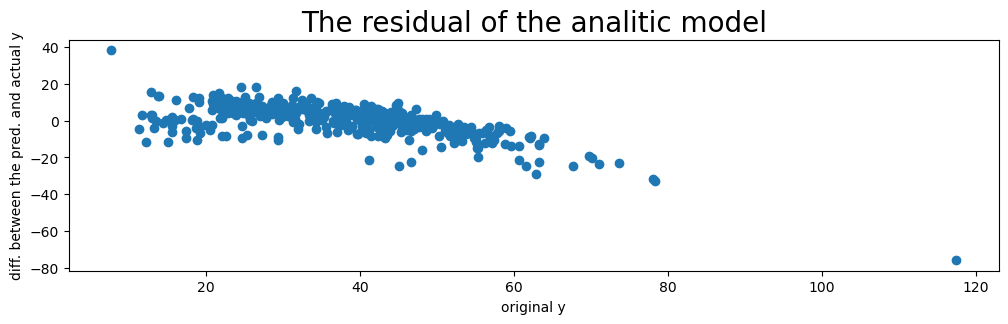

In [25]:
analiticpred = model.predict(dfnew)
figure(figsize=(12, 3))
scatter(y, analiticpred-y)
title("The residual of the analitic model", size = 20)
xlabel("original y", size = 10)
ylabel("diff. between the pred. and actual y")

Text(0, 0.5, 'actual price')

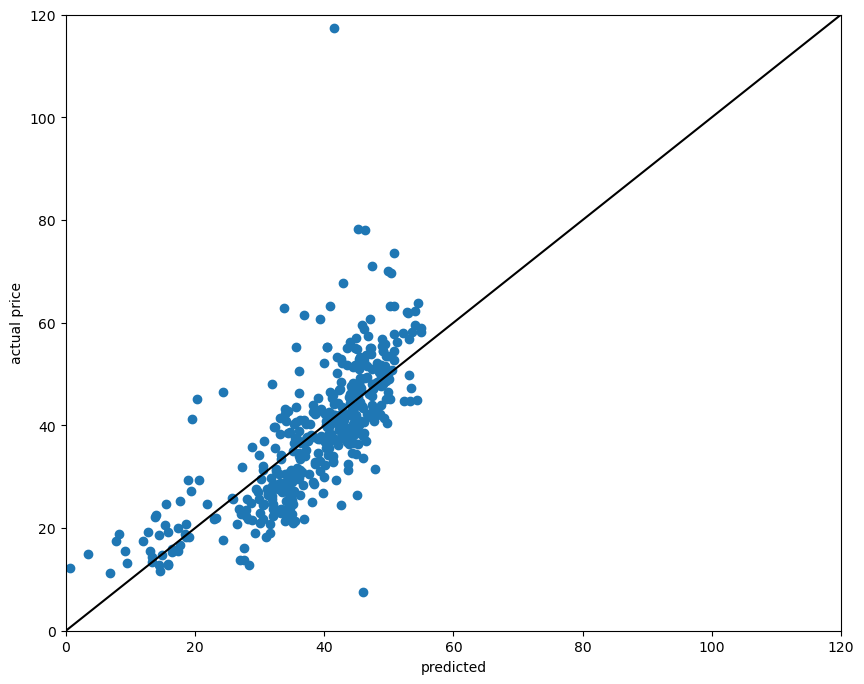

In [26]:
x = [0,120]
yí = [0,120]
scatter(analiticpred,y)
plot(x,yí, color = "black")
xlim(0,120)
ylim(0,120)
xlabel("predicted")
ylabel("actual price")


I would buy the houses where the predicted price is higher than the acutal

### Task 5

In [27]:
dfnew = pd.DataFrame(df.iloc[:,1:5]) 

In [28]:
# Feature scaling to speed up convergence
df_scaled = (dfnew-dfnew.mean())/dfnew.std()
# Add a bias term (X0)
df_scaled.insert(0, 'X0', 1)
#converting the DataFrame to array
X = df_scaled.values


In [29]:
X

array([[ 1.        , -0.82268782,  1.25411095, -0.79153734,  2.00498156],
       [ 1.        , -0.82268782,  0.15689638, -0.61586648,  1.66548775],
       [ 1.        ,  1.5392887 , -0.38732204, -0.41351495,  0.30751251],
       ...,
       [ 1.        ,  0.35830044,  0.09545237, -0.5490142 ,  0.98650013],
       [ 1.        , -0.52832738, -0.8437633 , -0.7757453 ,  0.30751251],
       [ 1.        ,  1.24492826, -0.98420677, -0.78711836,  1.66548775]])

In [30]:
#mean squared error is commonly used as a cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.dot((np.dot(X,theta)-y),(np.dot(X,theta)-y))
    return cost

def comp_cost_vectorized(X, y, theta):

    m = len(y)
    cost = 1/(2*m)*(X @ theta-y).T @ (X @ theta-y)

    return cost

In [31]:
def grad_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    theta_temp = np.zeros(X.shape[1])

    for iter in range(num_iters):
        # Calculate the predictions
        predictions = X.dot(theta)

        # Update theta_temp for the bias term (theta[0])
        theta_temp[0] = theta[0] - (alpha/m) * np.sum(predictions - y)

        # Update theta_temp for other features
        for idx_theta_temp in range(1, len(theta)):
            theta_temp[idx_theta_temp] = theta[idx_theta_temp] - (alpha/m) * np.sum((predictions - y) * X[:, idx_theta_temp])

        # Update theta
        for idx_theta in range(len(theta)):
            theta[idx_theta] = theta_temp[idx_theta]

        # Calculate and store the cost for this iteration
        J_history[iter] = compute_cost(X, y, theta)

    return J_history, theta

# Initialize parameters
theta_initial = np.zeros(X.shape[1])

# Set hyperparameters
alpha = 0.001
num_iters = 5000

# Run gradient descent
J_history, theta_final = grad_descent(X, y, theta_initial, alpha, num_iters)

# Display the final parameters
print("Final Parameters (theta):", theta_final)


Final Parameters (theta): [37.72492411  1.58940943 -2.90210705 -6.73475247  3.92226204]


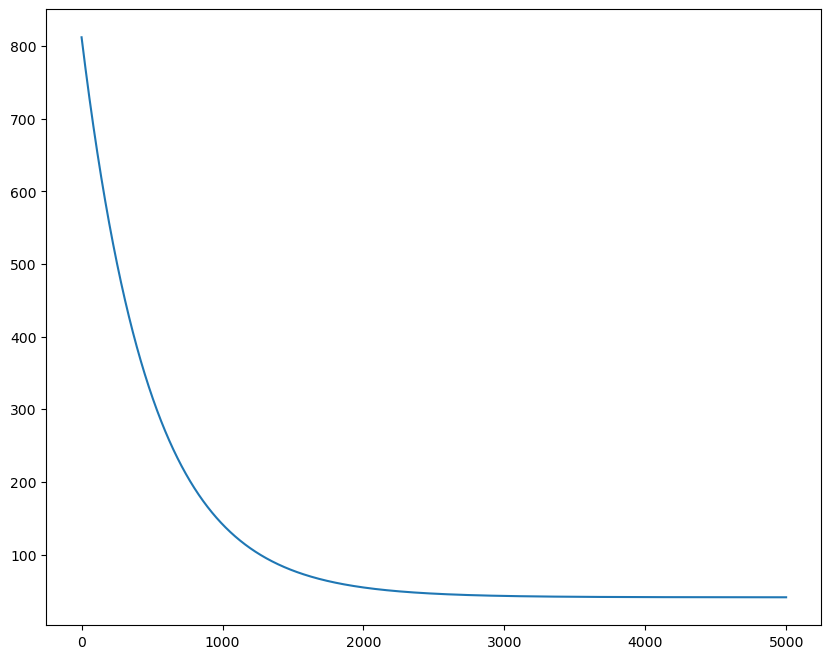

In [32]:
plot(range(num_iters),J_history)

Now we are going to compare the previously calculated parameters with the new

In [33]:
model.fit((dfnew-dfnew.mean())/dfnew.std(),y) #first we normalize this also as we did with the 

LinearRegression()

In [34]:
print(theta_final)
print(model.intercept_,model.coef_)

[37.72492411  1.58940943 -2.90210705 -6.73475247  3.92226204]
37.98019323671437 [ 1.62921879 -2.89913637 -6.95800639  3.70511645]


It is almost the same, but once again we have a small error.